In [161]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [162]:
racialProfiling = pd.read_csv ("2020_Racial_Profiling__RP__dataset.csv")
print (racialProfiling.shape)  # Shows number of rows and columns
pd.DataFrame.head (racialProfiling)

(68330, 24)


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (13,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Stop Key,Type,TCOLE Sex,TCOLE RACE ETHNICITY,Standardized Race Known,Reason for Stop,Street_Type,Search Yes or No,TCOLE Search Based On,TCOLE Search Found,...,COUNTY,Custody,Location,Sector,Standardized Race,Stop Date,Stop Time,X_COORDINATE,Y_COORDINATE,Zip Code
0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,500 E 8TH ST,GEORGE,WHITE,12/23/20,2154,3116003.0,10071013.0,78701.0
1,20202-459626535-25972,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1800 S LAMAR BLVD,DAVID,WHITE,12/23/20,2305,3106942.0,10064105.0,78704.0
2,20203-459887820-68511,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Violation of Law Other Than Traffic,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,S CONGRESS AVE / E OLTORF ST,DAVID,WHITE,1/1/20,NaN,3111177.0,10060019.0,78704.0
3,20204-459754277-68427,WARNING,Female,Hispanic/Latino,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1900 RUTLAND DR,EDWARD,HISPANIC OR LATINO,1/1/20,1049,3123026.0,10111289.0,78758.0
4,20205-65602014-68425,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,11000 RESEARCH BLVD NB,ADAM,WHITE,1/1/20,1036,3112256.0,10119108.0,78759.0


In [163]:
racialProfiling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68330 entries, 0 to 68329
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stop Key                 68330 non-null  object 
 1   Type                     68330 non-null  object 
 2   TCOLE Sex                68330 non-null  object 
 3   TCOLE RACE ETHNICITY     68330 non-null  object 
 4   Standardized Race Known  68330 non-null  object 
 5   Reason for Stop          68330 non-null  object 
 6   Street_Type              68330 non-null  object 
 7   Search Yes or No         68330 non-null  object 
 8   TCOLE Search Based On    68330 non-null  object 
 9   TCOLE Search Found       68330 non-null  object 
 10  TCOLE Result of Stop     68330 non-null  object 
 11  TCOLE Arrest Based On    68330 non-null  object 
 12  CENSUS_TRACT             861 non-null    float64
 13  Council District         46702 non-null  object 
 14  COUNTY                

In [164]:
## Renaming Columns for easier referencing

racialProfiling = racialProfiling.rename(columns={"Stop Key": "Stop_Key", 
                              "TCOLE Sex": "TCOLE_Sex",
                              "TCOLE RACE ETHNICITY": "TCOLE_RACE_ETHNICITY",
                              "Standardized Race Known": "Standardized_Race_Known", 
                              "Reason for Stop": "Reason_for_Stop",
                              "Search Yes or No": "Search_Yes_or_No",
                              "TCOLE Search Based On": "TCOLE_Search_Based_On",
                              "TCOLE Search Found": "TCOLE_Search_Found",
                              "TCOLE Result of Stop": "TCOLE_Result_of_Stop", 
                              "TCOLE Arrest Based On": "TCOLE_Arrest_Based_On",
                                                  
                              "Council District": "Council_District",
                              "Standardized Race": "Standardized_Race",
                              "Stop Date": "Stop_Date",
                                                  
                              "Stop Time": "Stop_Time",
                              "Zip Code": "Zip_Code", 
                              
                                 })

pd.DataFrame.head (racialProfiling)

,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,TCOLE_Search_Found,...,COUNTY,Custody,Location,Sector,Standardized_Race,Stop_Date,Stop_Time,X_COORDINATE,Y_COORDINATE,Zip_Code
0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,500 E 8TH ST,GEORGE,WHITE,12/23/20,2154,3116003.0,10071013.0,78701.0
1,20202-459626535-25972,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1800 S LAMAR BLVD,DAVID,WHITE,12/23/20,2305,3106942.0,10064105.0,78704.0
2,20203-459887820-68511,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Violation of Law Other Than Traffic,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,S CONGRESS AVE / E OLTORF ST,DAVID,WHITE,1/1/20,NaN,3111177.0,10060019.0,78704.0
3,20204-459754277-68427,WARNING,Female,Hispanic/Latino,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1900 RUTLAND DR,EDWARD,HISPANIC OR LATINO,1/1/20,1049,3123026.0,10111289.0,78758.0
4,20205-65602014-68425,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,11000 RESEARCH BLVD NB,ADAM,WHITE,1/1/20,1036,3112256.0,10119108.0,78759.0


In [165]:
# Total number of missing values per column.

Column_NaN_Values = {
                     "Stop_Key": racialProfiling["Stop_Key"].isna().sum(), 
                     "TCOLE_Sex": racialProfiling["TCOLE_Sex"].isna().sum(),
                    "TCOLE_RACE_ETHNICITY": racialProfiling["TCOLE_RACE_ETHNICITY"].isna().sum(),
    
                     "Search_Yes_or_No": racialProfiling["Search_Yes_or_No"].isna().sum(), 
                     "Reason_for_Stop": racialProfiling["Reason_for_Stop"].isna().sum(),
                    "Standardized_Race_Known": racialProfiling["Standardized_Race_Known"].isna().sum(),
                     
                    "TCOLE_Search_Based_On": racialProfiling["TCOLE_Search_Based_On"].isna().sum(), 
                     "TCOLE_Search_Found": racialProfiling["TCOLE_Search_Found"].isna().sum(),
                    "TCOLE_Result_of_Stop": racialProfiling["TCOLE_Result_of_Stop"].isna().sum(),
    
                    "TCOLE_Arrest_Based_On": racialProfiling["TCOLE_Arrest_Based_On"].isna().sum(), 
                    "Council_District": racialProfiling["Council_District"].isna().sum(),
                    "Standardized_Race": racialProfiling["Standardized_Race"].isna().sum(),
                    
                    "Stop_Date": racialProfiling["Stop_Date"].isna().sum(), 
                    "Stop_Time": racialProfiling["Stop_Time"].isna().sum(),
                    "Zip_Code": racialProfiling["Zip_Code"].isna().sum(),
    
    
                    "Type": racialProfiling["Type"].isna().sum(), 
                    "Street_Type": racialProfiling["Street_Type"].isna().sum(),
                    "CENSUS_TRACT": racialProfiling["CENSUS_TRACT"].isna().sum(),
    
                    "COUNTY": racialProfiling["COUNTY"].isna().sum(), 
                    "Custody": racialProfiling["Custody"].isna().sum(),
                    "Location": racialProfiling["Location"].isna().sum(),
                    
                    "Sector": racialProfiling["Sector"].isna().sum(), 
                    "X_COORDINATE": racialProfiling["X_COORDINATE"].isna().sum(),
                    "Y_COORDINATE": racialProfiling["Y_COORDINATE"].isna().sum(),
    
     
       }
Column_NaN_Values

{'Stop_Key': 0,
 'TCOLE_Sex': 0,
 'TCOLE_RACE_ETHNICITY': 0,
 'Search_Yes_or_No': 0,
 'Reason_for_Stop': 0,
 'Standardized_Race_Known': 0,
 'TCOLE_Search_Based_On': 0,
 'TCOLE_Search_Found': 0,
 'TCOLE_Result_of_Stop': 0,
 'TCOLE_Arrest_Based_On': 0,
 'Council_District': 21628,
 'Standardized_Race': 0,
 'Stop_Date': 0,
 'Stop_Time': 384,
 'Zip_Code': 22682,
 'Type': 0,
 'Street_Type': 0,
 'CENSUS_TRACT': 67469,
 'COUNTY': 21628,
 'Custody': 0,
 'Location': 4,
 'Sector': 21628,
 'X_COORDINATE': 22662,
 'Y_COORDINATE': 22662}

In [166]:
# How many unique() values are in Agency Column
racialProfiling.Council_District.unique()

array(['Council District 9', 'Council District 5', 'Council District 4',
       'Council District 10', 'Council District 6', 'Council District 7',
       'Council District 3', 'Council District 2', 'unknown',
       'Council District 1', 'Council District 8', nan], dtype=object)

In [167]:
racialProfiling.COUNTY.unique()

array(['TRAVIS COUNTY', 'WILLIAMSON COUNTY', 'unknown', nan,
       'HAYS COUNTY', 'BASTROP'], dtype=object)

In [168]:
racialProfiling.Sector.unique()

array(['GEORGE', 'DAVID', 'EDWARD', 'ADAM', 'BAKER', 'FRANK', 'HENRY',
       'UNKNOWN', 'IDA', 'CHARLIE', 'OUT OF CITY', 'AIRPORT', nan],
      dtype=object)

In [169]:
# Drop the following columns:  because they are not necessary or important to the analysis.
racialProfiling = racialProfiling.drop("CENSUS_TRACT", axis=1)
#racialProfiling = racialProfiling.drop("Zip_Code", axis=1) zipcodes needed to get lat, long info

In [170]:
racialProfiling.shape

(68330, 23)

In [171]:
# Dropping the remaining NaN values 
racialProfiling = racialProfiling.dropna()
racialProfiling.shape

(45271, 23)

In [172]:
racialProfiling.head()

,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,TCOLE_Search_Found,...,COUNTY,Custody,Location,Sector,Standardized_Race,Stop_Date,Stop_Time,X_COORDINATE,Y_COORDINATE,Zip_Code
0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,500 E 8TH ST,GEORGE,WHITE,12/23/20,2154,3116003.0,10071013.0,78701.0
1,20202-459626535-25972,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1800 S LAMAR BLVD,DAVID,WHITE,12/23/20,2305,3106942.0,10064105.0,78704.0
3,20204-459754277-68427,WARNING,Female,Hispanic/Latino,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,1900 RUTLAND DR,EDWARD,HISPANIC OR LATINO,1/1/20,1049,3123026.0,10111289.0,78758.0
4,20205-65602014-68425,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,TRAVIS COUNTY,NOT APPLICABLE,11000 RESEARCH BLVD NB,ADAM,WHITE,1/1/20,1036,3112256.0,10119108.0,78759.0
5,20206-459276358-68461,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,US Highway,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,WILLIAMSON COUNTY,NOT APPLICABLE,LAKELINE MALL DR / N US 183 HWY SVRD SB,ADAM,WHITE,1/1/20,1356,3094826.0,10144782.0,78613.0


In [173]:
# How many unique() values are in Agency Column
Districts = racialProfiling.Council_District.unique()
Districts

array(['Council District 9', 'Council District 5', 'Council District 4',
       'Council District 10', 'Council District 6', 'Council District 7',
       'Council District 3', 'Council District 2', 'Council District 1',
       'Council District 8', 'unknown'], dtype=object)

<AxesSubplot:xlabel='Districts', ylabel='frequency'>

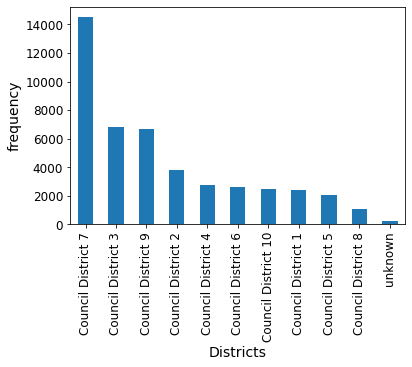

In [174]:
fig, ax = plt.subplots()
racialProfiling['Council_District'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Districts', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Sex', ylabel='frequency'>

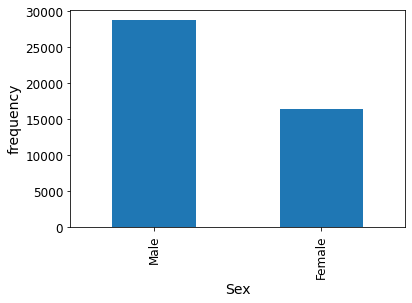

In [175]:
fig, ax = plt.subplots()
racialProfiling['TCOLE_Sex'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Sex', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Type', ylabel='frequency'>

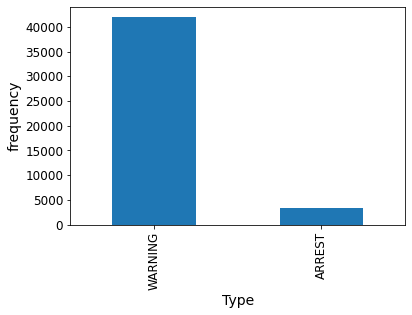

In [176]:
fig, ax = plt.subplots()
racialProfiling['Type'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Type', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='TCOLE_RACE_ETHNICITY', ylabel='frequency'>

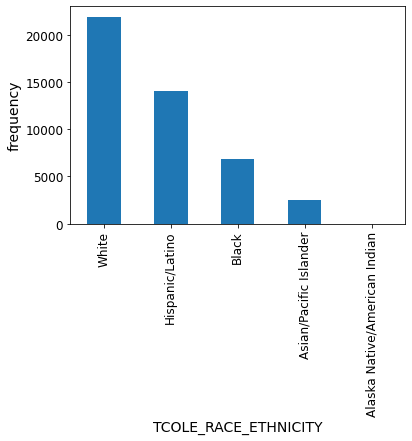

In [177]:
fig, ax = plt.subplots()
racialProfiling['TCOLE_RACE_ETHNICITY'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='TCOLE_RACE_ETHNICITY', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Standardized_Race_Known', ylabel='frequency'>

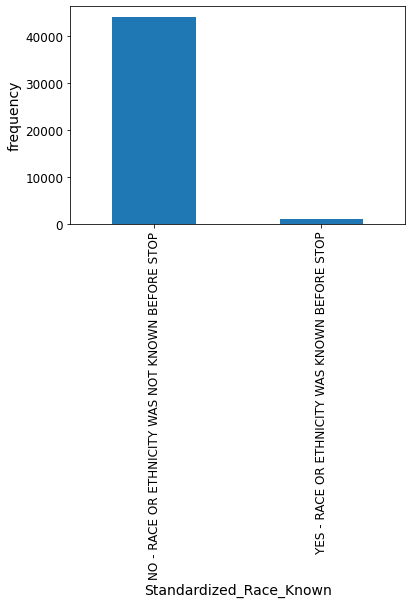

In [178]:
fig, ax = plt.subplots()
racialProfiling['Standardized_Race_Known'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Standardized_Race_Known', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Reason_for_Stop', ylabel='frequency'>

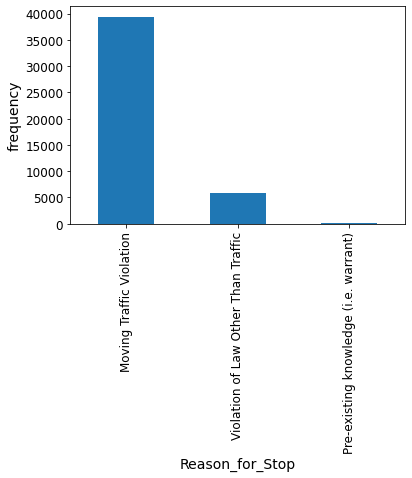

In [179]:
fig, ax = plt.subplots()
racialProfiling['Reason_for_Stop'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Reason_for_Stop', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Street_Type', ylabel='frequency'>

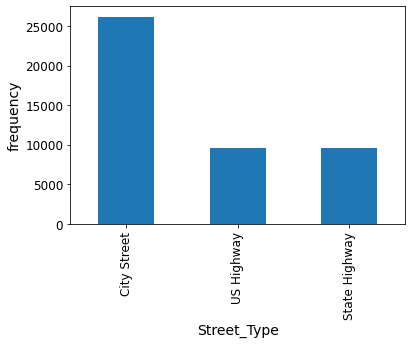

In [180]:
fig, ax = plt.subplots()
racialProfiling['Street_Type'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Street_Type', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Search_Yes_or_No', ylabel='frequency'>

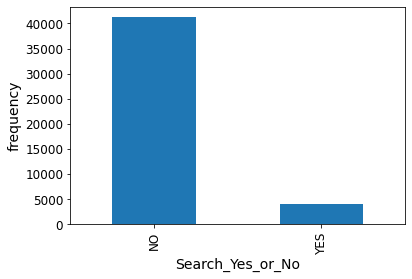

In [181]:
fig, ax = plt.subplots()
racialProfiling['Search_Yes_or_No'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Search_Yes_or_No', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='TCOLE_Search_Based_On', ylabel='frequency'>

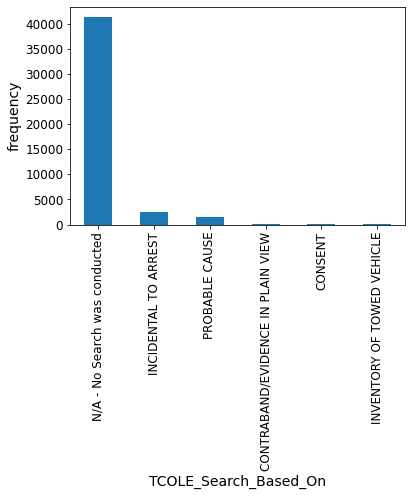

In [182]:
fig, ax = plt.subplots()
racialProfiling['TCOLE_Search_Based_On'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='TCOLE_Search_Based_On', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='TCOLE_Search_Found', ylabel='frequency'>

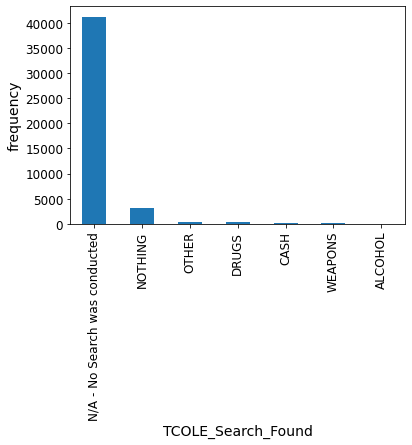

In [183]:
fig, ax = plt.subplots()
racialProfiling['TCOLE_Search_Found'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='TCOLE_Search_Found', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='COUNTY', ylabel='frequency'>

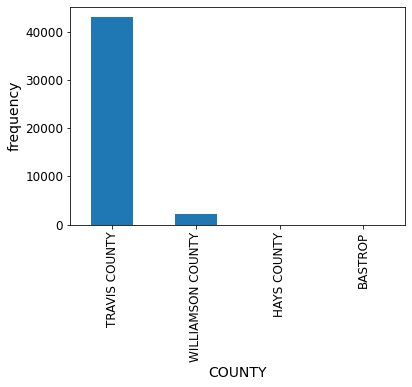

In [184]:
fig, ax = plt.subplots()
racialProfiling['COUNTY'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='COUNTY', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Custody', ylabel='frequency'>

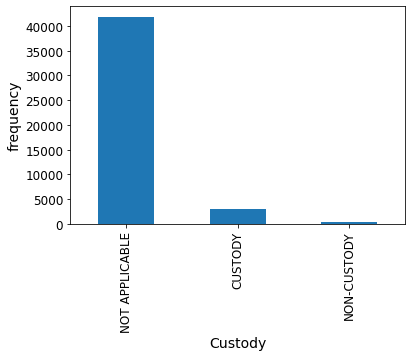

In [185]:
fig, ax = plt.subplots()
racialProfiling['Custody'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Custody', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Sector', ylabel='frequency'>

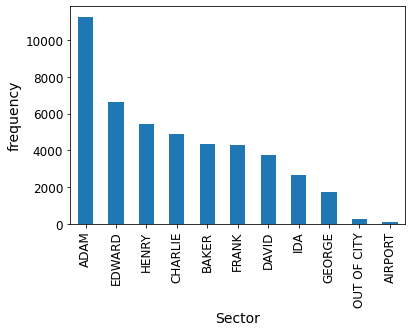

In [186]:
fig, ax = plt.subplots()
racialProfiling['Sector'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Sector', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Standardized_Race', ylabel='frequency'>

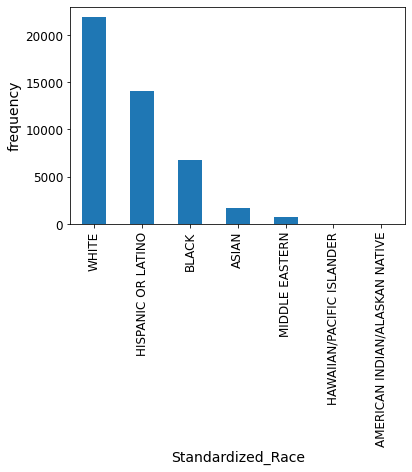

In [187]:
fig, ax = plt.subplots()
racialProfiling['Standardized_Race'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Standardized_Race', 
                                                        ylabel='frequency')

In [188]:
# Split Stop_Date in month, day and year

# new data frame with split value columns
new = racialProfiling["Stop_Date"].str.split("/", n = 2, expand = True)
  
# making separate first name column from new data frame
racialProfiling["Stop_Month"]= new[0]
  
# making separate last name column from new data frame
racialProfiling["Stop_Day"]= new[1]

# making separate last name column from new data frame
racialProfiling["Stop_Year"]= new[2]
  
# Dropping old Name columns
#racialProfiling.drop(columns =["Stop_Date"], inplace = True)
  
# df display
racialProfiling.head()

,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,TCOLE_Search_Found,...,Sector,Standardized_Race,Stop_Date,Stop_Time,X_COORDINATE,Y_COORDINATE,Zip_Code,Stop_Month,Stop_Day,Stop_Year
0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,GEORGE,WHITE,12/23/20,2154,3116003.0,10071013.0,78701.0,12,23,20
1,20202-459626535-25972,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,DAVID,WHITE,12/23/20,2305,3106942.0,10064105.0,78704.0,12,23,20
3,20204-459754277-68427,WARNING,Female,Hispanic/Latino,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,EDWARD,HISPANIC OR LATINO,1/1/20,1049,3123026.0,10111289.0,78758.0,1,1,20
4,20205-65602014-68425,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,ADAM,WHITE,1/1/20,1036,3112256.0,10119108.0,78759.0,1,1,20
5,20206-459276358-68461,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,US Highway,NO,N/A - No Search was conducted,N/A - No Search was conducted,...,ADAM,WHITE,1/1/20,1356,3094826.0,10144782.0,78613.0,1,1,20


<AxesSubplot:xlabel='Stop_Month', ylabel='frequency'>

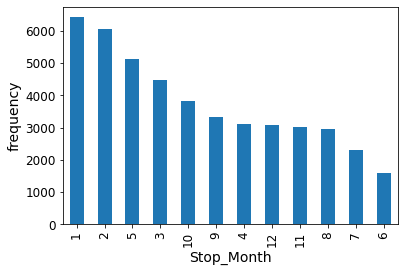

In [189]:
fig, ax = plt.subplots()
racialProfiling['Stop_Month'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Stop_Month', 
                                                        ylabel='frequency')

<AxesSubplot:xlabel='Stop_Day', ylabel='frequency'>

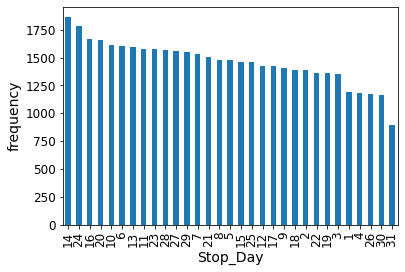

In [190]:
fig, ax = plt.subplots()
racialProfiling['Stop_Day'].value_counts().plot(ax=ax, kind='bar', 
                                                        xlabel='Stop_Day', 
                                                        ylabel='frequency')

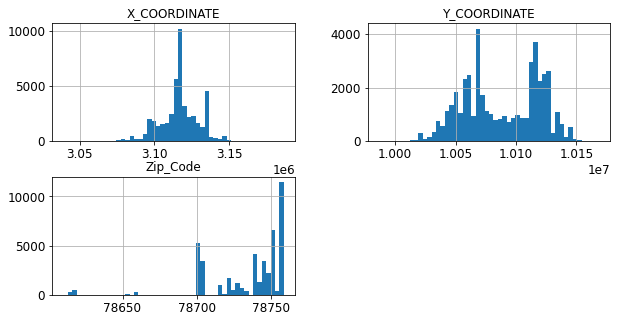

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

racialProfiling.hist(bins=50, figsize=(10,5))
#save_fig("attribute_histogram_plots")
plt.show()

In [192]:

#arrests2.to_csv(index=False)
#racialProfiling.to_csv('racialProfUpdated.csv', encoding='utf-8')